# Run PG-SUI Development

Jupyter notebook for running PG-SUi during development.

In [1]:
# Standard library imports
import argparse
import sys

import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn_genetic.space import Continuous, Categorical, Integer

# from pgsui.impute.estimators import ImputeStandardAutoEncoder

# from pgsui import GenotypeData

# For development only. Package should be installed.
sys.path.append(r'C:/Users/evobi/Desktop/PG-SUI/pgsui')
sys.path.append(r'C:/Users/evobi/Desktop/PG-SUI')

from pgsui.read_input.read_input import GenotypeData
from pgsui.impute.estimators import (
    ImputeNLPCA,
    ImputeUBP,
    ImputeRandomForest,
    ImputeVAE,
    ImputeStandardAutoEncoder,
)
from pgsui.impute.simple_imputers import ImputePhylo, ImputeAlleleFreq
from pgsui.utils.plotting import Plotting

c:\Users\evobi\anaconda3\envs\pg-sui-dev-tf210\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [7]:
# Define input files.
aln = "../pgsui/example_data/phylip_files/test_n500.phy"
filetype="phylip"
popmapfile="../pgsui/example_data/popmaps/test.popmap"
guidetree="../pgsui/example_data/trees/test.tre"
qmat="../pgsui/example_data/trees/test.iqtree"
siterates="../pgsui/example_data/trees/test_n500.rate"
prefix="test"

In [8]:
data = GenotypeData(
            filename=aln,
            filetype=filetype,
            popmapfile=popmapfile,
            guidetree=guidetree,
            qmatrix_iqtree=qmat,
            siterates_iqtree=siterates,
            prefix=prefix,
        )


Reading phylip file ../pgsui/example_data/phylip_files/test_n500.phy...
Done!

Converting genotypes to one-hot encoding...
Done!

Converting genotypes to 012 encoding...
Done!


In [9]:
data.missingness_reports(prefix=prefix, plot_format="png")

In [10]:
# For GridSearchCV. Generate parameters to sample from.
learning_rate = [float(10) ** x for x in np.arange(-5, -2)]
l1_penalty = [float(10) ** x for x in np.arange(-6, -1)]
l1_penalty.append(0.0)
l2_penalty = [float(10) ** x for x in np.arange(-6, -1)]
l2_penalty.append(0.0)
hidden_activation = ["elu", "relu"]
num_hidden_layers = [1, 2, 3]
hidden_layer_sizes = ["sqrt", "midpoint"]
n_components = [2, 3, 5, 10]
dropout_rate = [0.0, 0.2, 0.4]
# batch_size = [16, 32, 48, 64]
optimizer = ["adam", "sgd", "adagrad"]

# Some are commented out for testing purposes.
grid_params = {
    "learning_rate": learning_rate,
    "l1_penalty": l1_penalty,
    "l2_penalty": l2_penalty,
    # "hidden_layer_sizes": hidden_layer_sizes,
    "n_components": n_components,
    "dropout_rate": dropout_rate,
    # "optimizer": optimizer,
    "num_hidden_layers": num_hidden_layers,
    "hidden_activation": hidden_activation,
}


Doing VAE imputation without grid search...
Imputing all features at once since chunk_size is set to 1.0


Epoch: 100%|██████████| 100/100 [03:22<00:00,  2.03s/epoch, loss=98.1, reconstruction_loss=2.25, kl_loss=95.8, accuracy=0.69, lr=1e-04]


Finshed 'fit' in 0:03:25.340596


Done with VAE imputation!


Done!

Finshed 'fit_predict' in 0:03:50.314928



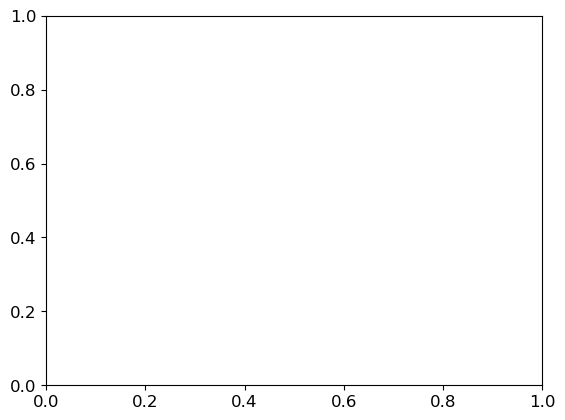

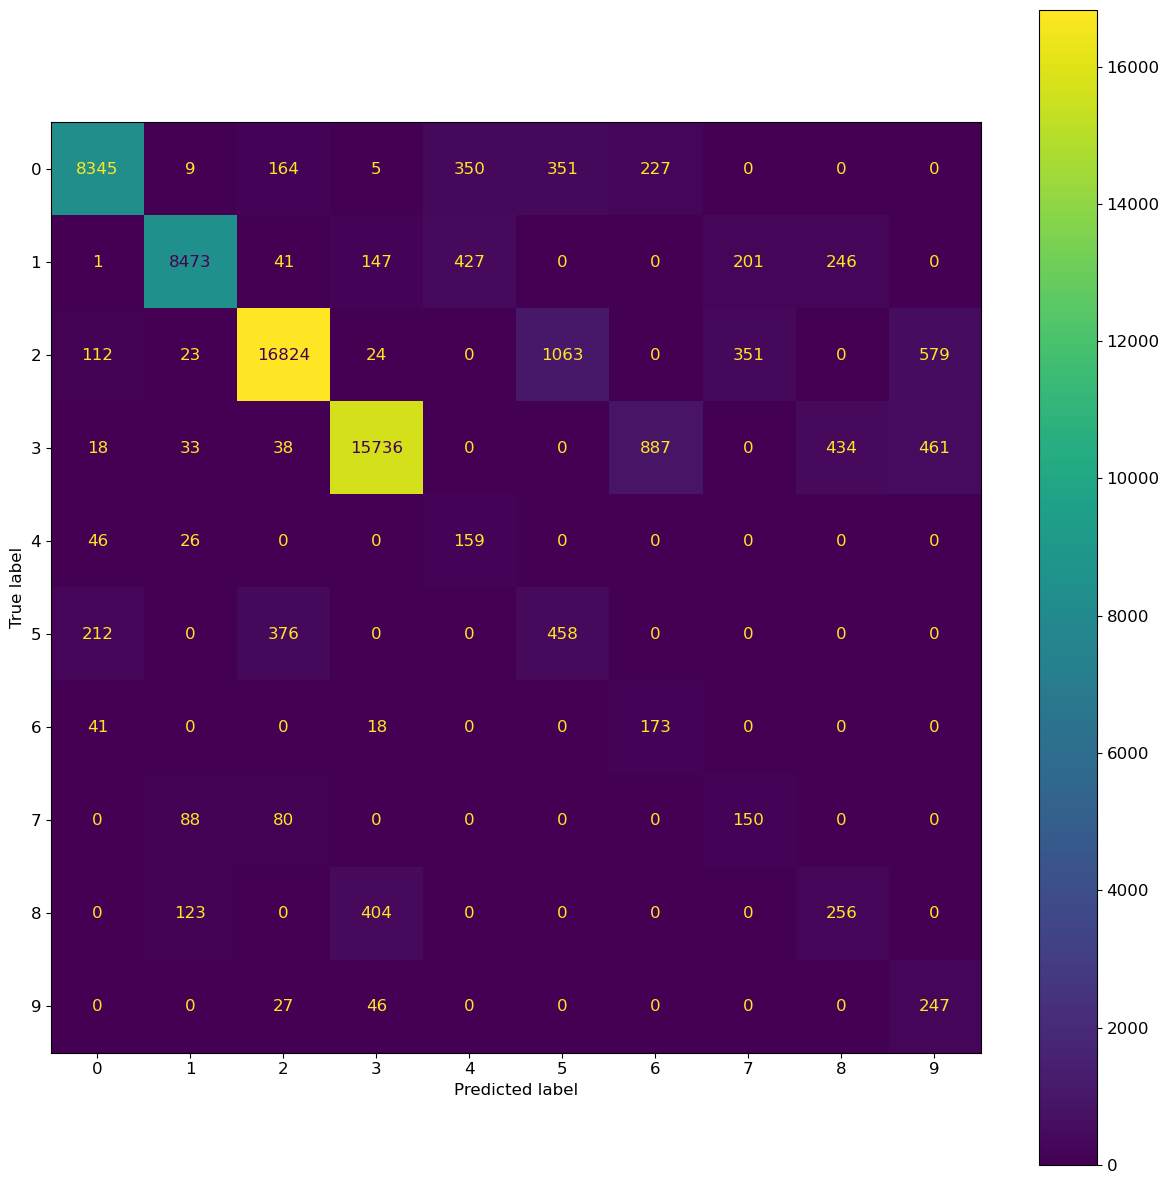

In [12]:
vae = ImputeVAE(
    data,
    disable_progressbar=True,
    epochs=100,
    column_subset=1.0,
    learning_rate=0.001,
    num_hidden_layers=3,
    hidden_layer_sizes="midpoint",
    verbose=10,
    dropout_rate=0.2,
    hidden_activation="elu",
    batch_size=32,
    l1_penalty=0.01,
    l2_penalty=0.01,
    # gridparams=grid_params,
    n_jobs=4,
    grid_iter=5,
    sim_strategy="nonrandom_weighted",
    sim_prop_missing=0.5,
    scoring_metric="f1_score",
    gridsearch_method="gridsearch",
    early_stop_gen=5,
    n_components=5,
    validation_split=0.0,
    sample_weights="auto",
    prefix=prefix,
)